# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
"valid: -3, peak: 0.97, rpn: 0.35, classifier: 0.55"

Mounted at /content/drive


In [1]:
!pip install pykml urllib3 haversine exifread pyproj geocoder geopy overpass
!apt install proj-bin libproj-dev libgeos-dev
%cd /content/drive/MyDrive/CV Final Project/Keras-FasterRCNN
!pip install tensorflow-gpu
!pip install -r requirements.txt
%cd ..

import IPython
from IPython.display import Javascript, display, clear_output
from glob import glob
import cv2

clear_output()
%matplotlib inline
%cd /content/drive/MyDrive/CV Final Project/PeakFinder
# General Classes
from PeakFinderUtils import Location, Peak, Circle, Photo
# Other util functions
from PeakFinderUtils import *
preventScrolling()
clear_output()


valid_photos = [path for path in glob('./images/*.jpg') if check_photo_exif(path)]

# Faster-RCNN Detection Only

In [2]:
# ALL PHOTOS EXIF EXCLUDED/ JUST PEAK DETECTION
PEAK_THESHOLD = 0.99 # lower is stricter
img_paths = glob('./images/validation/*')
# extras = glob('/content/drive/MyDrive/CV Final Project/data/exif_images/*')
# img_paths.extend(extras)

for path in img_paths:
    img = cv2.imread(path)
    original = img.copy()
    print(path)  
    results, peaks = get_bboxes_in_photo_overlap(path, 0, PEAK_THESHOLD, 0.6,0.3)
    for bbox in peaks:
        img = cv2.rectangle(img,(bbox[0], bbox[1]), (bbox[2], bbox[3]), (0,255,0), int(img.shape[1]/200))
    display(imdisplay(np.hstack([original,img]), width=1000))
    print("*"*100)
    print("\n")


Output hidden; open in https://colab.research.google.com to view.

# Labeling Examples

****************************************************************************************************


Order from left to right is:

UN 10418
        	Latitude: 37.5274
        	Longitude: -105.374
        	Elevation: 3175.0m

UN 11203
        	Latitude: 37.5374
        	Longitude: -106.449
        	Elevation: 3415.0m

Hogback Mesa North
        	Latitude: 37.5326
        	Longitude: -106.5674
        	Elevation: 3726.0m

UN 11533
        	Latitude: 37.5279
        	Longitude: -106.4263
        	Elevation: 3515.0m


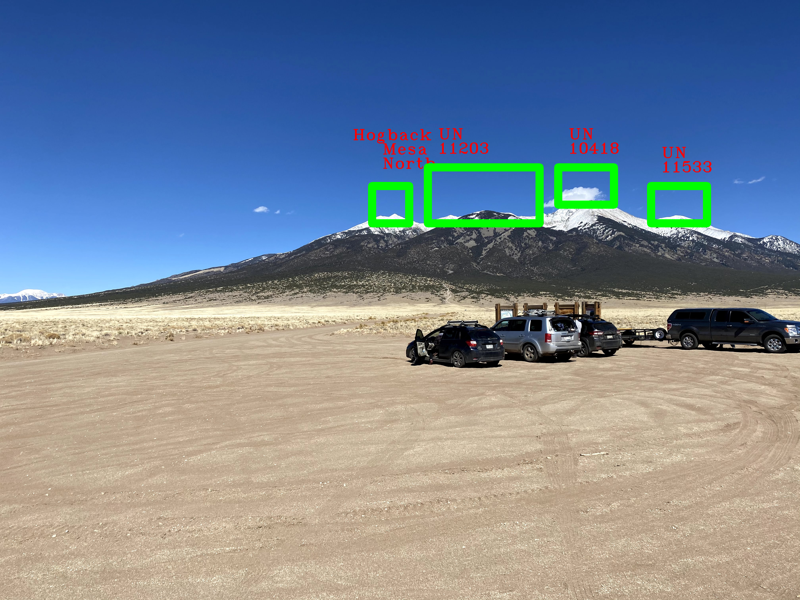

In [3]:


LIMIT_MAX_TO_FOUND = False
PEAK_THRESHOLD = 0.9875 # lower is stricter
PEAK_DATABASE = MountainDatabase('extracted_mountains.csv')

photo = Photo(valid_photos[2])
peaks_in_photo = PEAK_DATABASE.get_peaks_in_photo(photo, within_distance=75, error_threshold_distance=200)

order_vals = []
for peak in peaks_in_photo:
    x,y = photo.get_xy_coord(peak.location)
    order_vals.append(x)
order = np.argsort(order_vals)

print("*"*100+"\n\n")
if len(peaks_in_photo) != 0: print("Order from left to right is:")
for peak in order:
    print(peaks_in_photo[peak])
results, bboxes = get_bboxes_in_photo_overlap(photo.filepath, 0, PEAK_THRESHOLD, 0.7, 0.1)
final_boxes = []
for i, tag in enumerate(results):
    if tag[0] == 'mountain':
        final_boxes.append(bboxes[i])
        results.pop(i)
        bboxes.pop(i)
for i in range(len(bboxes)):
    if LIMIT_MAX_TO_FOUND:
        if len(final_boxes) == len(peaks_in_photo):
            break
        final_boxes.append(bboxes[len(bboxes)- i-1])
    else: final_boxes.append(bboxes[i])

if len(peaks_in_photo) < len(bboxes) and len(peaks_in_photo) != 0 and LIMIT_MAX_TO_FOUND: 
    print("Detected more peaks than actually visible. Only showing most probable.")
    bboxes = bboxes[:len(peaks_in_photo)]
peak_num = 0
for i, bbox in enumerate(final_boxes):
    if i == 2: continue
    photo.draw_bbox(bbox)
    try: 
        put_centered_text(photo.cv_image, peaks_in_photo[peak_num].name, (bbox[0], bbox[1]))
        peak_num += 1
    except: continue
photo.display()

****************************************************************************************************


Order from left to right is:

South Table Mountain
        	Latitude: 39.7585
        	Longitude: -105.209
        	Elevation: 1931.0m


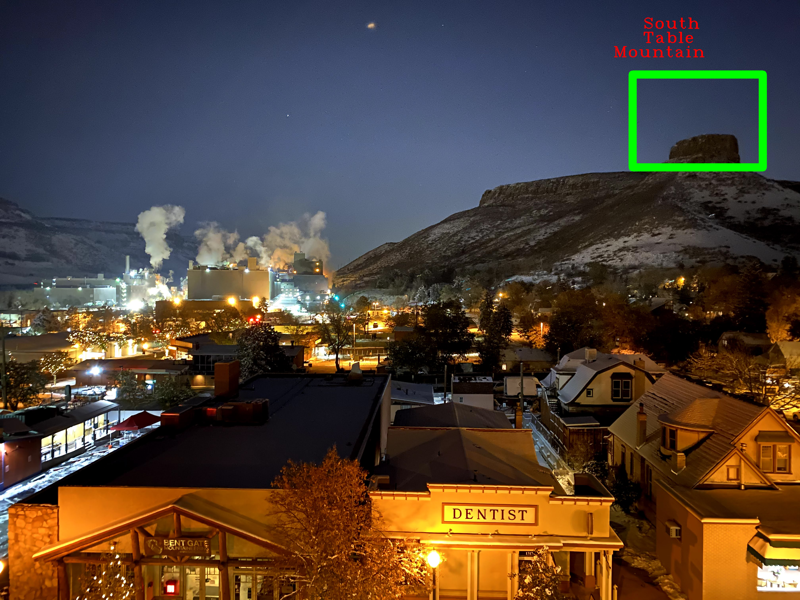

In [4]:
LIMIT_MAX_TO_FOUND = False
PEAK_THRESHOLD = 0.97 # lower is stricter
PEAK_DATABASE = MountainDatabase('extracted_mountains.csv')

photo = Photo(valid_photos[1])
peaks_in_photo = PEAK_DATABASE.get_peaks_in_photo(photo, within_distance=75, error_threshold_distance=200)

order_vals = []
for peak in peaks_in_photo:
    x,y = photo.get_xy_coord(peak.location)
    order_vals.append(x)
order = np.argsort(order_vals)

print("*"*100+"\n\n")
if len(peaks_in_photo) != 0: print("Order from left to right is:")
for peak in order:
    print(peaks_in_photo[peak])
results, bboxes = get_bboxes_in_photo_overlap(photo.filepath, 0, PEAK_THRESHOLD, 0.999, 0.001)
final_boxes = []
for i, tag in enumerate(results):
    if tag[0] == 'mountain':
        final_boxes.append(bboxes[i])
        results.pop(i)
        bboxes.pop(i)
for i in range(len(bboxes)):
    if LIMIT_MAX_TO_FOUND:
        if len(final_boxes) == len(peaks_in_photo):
            break
        final_boxes.append(bboxes[len(bboxes)- i-1])
    else: final_boxes.append(bboxes[i])

if len(peaks_in_photo) < len(bboxes) and len(peaks_in_photo) != 0 and LIMIT_MAX_TO_FOUND: 
    print("Detected more peaks than actually visible. Only showing most probable.")
    bboxes = bboxes[:len(peaks_in_photo)]
for i, bbox in enumerate(final_boxes):
    photo.draw_bbox(bbox)
    put_centered_text(photo.cv_image, peaks_in_photo[i].name, (bbox[0], bbox[1]))
photo.display()

# All Valid Photos

In [ ]:

LIMIT_MAX_TO_FOUND = True
PEAK_THRESHOLD = 0.97 # lower is stricter
PEAK_DATABASE = MountainDatabase('extracted_mountains.csv')

for path in valid_photos:
    photo = Photo(path)
    peaks_in_photo = PEAK_DATABASE.get_peaks_in_photo(photo, within_distance=75, error_threshold_distance=200)

    order_vals = []
    for peak in peaks_in_photo:
        x,y = photo.get_xy_coord(peak.location)
        order_vals.append(x)
    order = np.argsort(order_vals)

    print("*"*100+"\n\n")
    if len(peaks_in_photo) != 0: print("Order from left to right is:")
    for peak in order:
        print(peaks_in_photo[peak])
    results, bboxes = get_bboxes_in_photo(photo.filepath, 0, PEAK_THRESHOLD)
    final_boxes = []
    for i, tag in enumerate(results):
        if tag[0] == 'mountain':
            final_boxes.append(bboxes[i])
            results.pop(i)
            bboxes.pop(i)
    for i in range(len(bboxes)):
        if LIMIT_MAX_TO_FOUND:
            if len(final_boxes) == len(peaks_in_photo):
                break
            final_boxes.append(bboxes[len(bboxes)- i-1])
        else: final_boxes.append(bboxes[i])

    if len(peaks_in_photo) < len(bboxes) and len(peaks_in_photo) != 0 and LIMIT_MAX_TO_FOUND: 
        print("Detected more peaks than actually visible. Only showing most probable.")
        bboxes = bboxes[:len(peaks_in_photo)]
    for bbox in final_boxes:
        photo.draw_bbox(bbox)
    photo.display()

